In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics as mt
import statsmodels.api as sm
import scipy.stats as sts
import math
from sklearn.neighbors import KernelDensity
from sklearn.decomposition import PCA


import statsmodels.api as stm
import statsmodels.stats.weightstats as ws
import math

In [5]:
donnee = pd.read_csv('./Fichiers/DonneesVelosSeoulv0r1.csv')
donnee=donnee.dropna()
stats=donnee.describe()
dimensions=donnee.shape
nomsvariables = pd.DataFrame(donnee.columns)

nomsvariables

,0
0,Temperature(°C)
1,Humidité (%)
2,Vent (m/s)
3,Visibilité (10 m)
4,Point de rosée (°C)
5,Intensité du soleil (MJ/m2)
6,Pluie (mm)
7,Neige (cm)
8,Saison
9,Jour férié


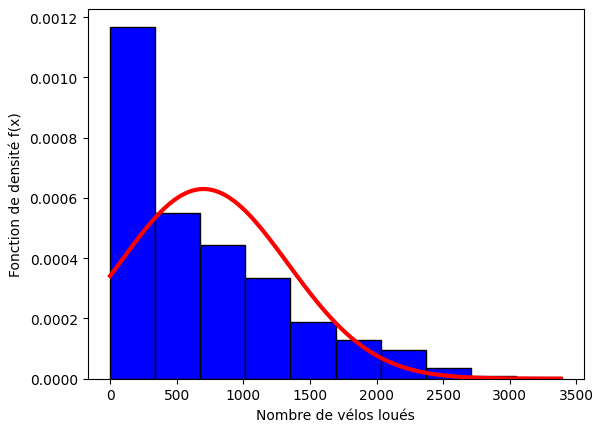

In [6]:
colName = 'Nombre de vélos loués'

d=1000
grille_x = np.linspace(donnee[colName].min(), donnee[colName].max(), d)
mu, sigma = sts.norm.fit(donnee[colName].values)
pdf = sts.norm.pdf(grille_x, mu, sigma)
ax=donnee[colName].plot.hist(density=True, bins = 10, color = 'blue', edgecolor = 'black')
ax.set_xlabel(colName)
ax.plot(grille_x, pdf, linewidth=3, color = 'red')
ax.set_ylabel("Fonction de densité f(x)")


Fit_normal = sts.kstest(donnee[colName],'norm',[mu, sigma])

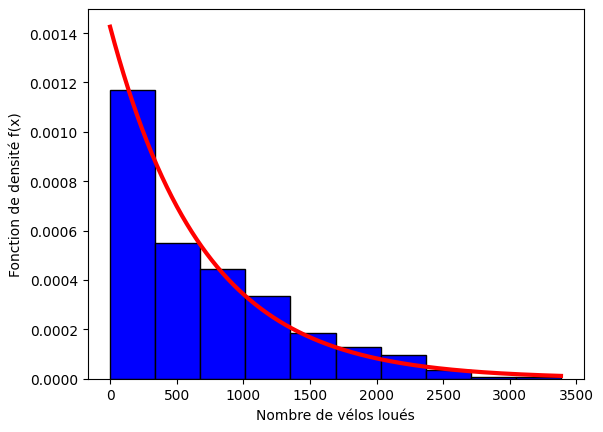

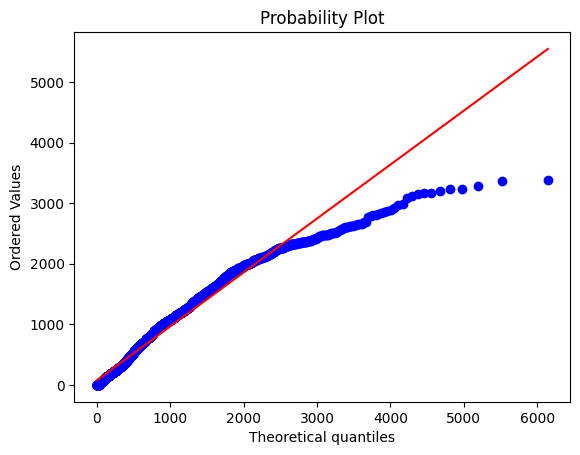

In [7]:
"Vérifier si les données suivent une loi exponentielle"
colName = 'Nombre de vélos loués'
var_nom = colName
Variable = donnee[colName]
d=1000
grille_x = np.linspace(Variable.min(), Variable.max(), d)
dx=(Variable.max()-(Variable.min()))/(d-1)
loc,lambdaa=sts.expon.fit(Variable.values)
param=sts.expon.fit(Variable.values)
pdf = sts.expon.pdf(grille_x,loc,lambdaa)
ax=Variable.plot.hist(density=True, bins = 10, color = 'blue', edgecolor = 'black')
ax.set_xlabel(var_nom)
ax.plot(grille_x, pdf, linewidth=3, color = 'red')
ax.set_ylabel("Fonction de densité f(x)")


sts.probplot(Variable.values, dist=sts.expon(loc,lambdaa),plot=plt.figure().add_subplot(111))
Fit_expon = sts.kstest(Variable.values,'expon',param)

In [ ]:
####
### Q1.1: La distribution exponentielle semble mieux "fitter"
####

In [8]:
dfX = donnee.drop(colName, axis=1).copy()
dfX.columns.values

array(['Temperature(°C)', 'Humidité (%)', 'Vent (m/s)',
       'Visibilité (10 m)', 'Point de rosée (°C)',
       'Intensité du soleil (MJ/m2)', 'Pluie (mm)', 'Neige (cm)',
       'Saison', 'Jour férié'], dtype=object)

In [10]:
from sklearn.linear_model import LinearRegression

Y = donnee[colName].copy()
dfX.dtypes

Temperature(°C)                float64
Humidité (%)                     int64
Vent (m/s)                     float64
Visibilité (10 m)                int64
Point de rosée (°C)            float64
Intensité du soleil (MJ/m2)    float64
Pluie (mm)                     float64
Neige (cm)                     float64
Saison                          object
Jour férié                       int64
dtype: object

In [13]:
dfX_numerique = pd.get_dummies(data=dfX, prefix='sais', prefix_sep='_', drop_first=True)
dfX_numerique

,Temperature(°C),Humidité (%),Vent (m/s),Visibilité (10 m),Point de rosée (°C),Intensité du soleil (MJ/m2),Pluie (mm),Neige (cm),Jour férié,sais_Spring,sais_Summer,sais_Winter
0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,0,0,0,1
1,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,0,0,0,1
2,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,0,0,0,1
3,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,0,0,0,1
4,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4427,-0.4,57,0.6,1270,-7.8,0.45,0.0,0.0,0,0,0,0
4428,7.8,20,2.2,2000,-13.8,1.67,0.0,0.0,0,0,0,0
4429,7.0,20,3.3,1994,-14.4,1.21,0.0,0.0,0,0,0,0
4430,6.0,29,2.1,1877,-10.7,0.23,0.0,0.0,0,0,0,0


In [18]:

def print_summary(pDfX, pColY):
    modele=sm.OLS(pColY,pDfX.assign(const=1))
    resultats=modele.fit()
    Y_chap = resultats.predict(pDfX.assign(const=1))
    print(resultats.summary()   )
     


In [19]:
## premier essai
print_summary(dfX_numerique, donnee[colName])


                              OLS Regression Results                             
Dep. Variable:     Nombre de vélos loués   R-squared:                       0.415
Model:                               OLS   Adj. R-squared:                  0.414
Method:                    Least Squares   F-statistic:                     261.4
Date:                   Thu, 15 Dec 2022   Prob (F-statistic):               0.00
Time:                           19:18:56   Log-Likelihood:                -33693.
No. Observations:                   4432   AIC:                         6.741e+04
Df Residuals:                       4419   BIC:                         6.750e+04
Df Model:                             12                                         
Covariance Type:               nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

In [21]:
## éliminons Point de rosée (°C) (p-value > 0.05)
dfX_numerique.drop('Point de rosée (°C)', axis=1, inplace=True)
print_summary(dfX_numerique, donnee[colName])

                              OLS Regression Results                             
Dep. Variable:     Nombre de vélos loués   R-squared:                       0.415
Model:                               OLS   Adj. R-squared:                  0.414
Method:                    Least Squares   F-statistic:                     285.2
Date:                   Thu, 15 Dec 2022   Prob (F-statistic):               0.00
Time:                           19:21:54   Log-Likelihood:                -33693.
No. Observations:                   4432   AIC:                         6.741e+04
Df Residuals:                       4420   BIC:                         6.749e+04
Df Model:                             11                                         
Covariance Type:               nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------

In [ ]:

from sklearn.preprocessing import StandardScaler


In [33]:
"Stardardisation"
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def get_score_pca(pDfX, pNbVar=2):
    scalerX = StandardScaler()
    Xstand = scalerX.fit_transform(pDfX.values)
    Xstand=pd.DataFrame(Xstand)
    Xstand.columns=pDfX.columns
    #print(Xstand)   
    # "PCA"
    a=pNbVar
    pca = PCA(n_components=a)
    pca.fit(Xstand)
    VarianceCapturee=pca.explained_variance_ratio_
    X_pca_mean=pca.mean_
    T=pca.transform(Xstand)
    P=pca.components_ 
    print("components: " , VarianceCapturee)
    print("variance capturé: ", VarianceCapturee.sum())


In [34]:
## essayons avec 2 pca
get_score_pca(dfX_numerique, 2)



components:  [0.22038819 0.19209318]
variance capturé:  0.41248137238858384


In [41]:
## et avec 5
get_score_pca(dfX_numerique, 5)

components:  [0.22038819 0.19209318 0.12968108 0.09631142 0.09052985]
variance capturé:  0.7290037196969842


In [39]:
len(dfX_numerique.columns)

11

In [ ]:
##########
##  Q1.2 avec 5/11 variables on peut cpaturer 73% de variance.
## c'est plus performant que le modèle initial
#############